# <center>University of Arizona Curricula - College of Engineering</center>

This notebook contains a prelmininary analyses of the curricula and degree plans associated with the undergradatue programs in the College of Engineering at the University of Arizona.  In order to execute the analyses provided in this notebook, you need to load the following Julia packages:

In [1]:
using CurricularAnalytics
using Glob
using CSV
using DataFrames
using Statistics

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-18260461570605274447\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-7911864050891223317\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-18260461570605274447\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

## Curricular Analytics Toolbox

The analyses in this notebook makes use of the Curricular Analytics toolbox built using the Julia programming language and available as open source software [1]. As a starting point, you may find it useful to read the toolbox documenation, as well as the curricular analytics paper listed in the References section below [2].

### Create the Data Structures 
Degree plans associated with four different disciplines (animal science, mechanical engineering, music education, and psychology) were collected from each of the eleven schools in the cluster. The degree plans were stored as CSV files using the format for degree plans specified in the Curricular Analytics toolbox.  The files are organized in a directory structure that is assumed to be in the same directory as this notebook as follows:  `./programs/<college-name>/`

Asuuming the aforementioned directory structure, we first create an dictionay called `plans` containing the degree plans for each of the programs in a given college, in this case the college of engineering.

In [2]:
college = "engineering"
plans = Dict{String, DegreePlan}()
program_files = glob("*", "./programs/$college")
for program in program_files
    dp = read_csv(program)
    complexity(dp.curriculum)  # compute the curricular complexity of the degree plan
    plans[dp.curriculum.name] = dp    # store the degree plan the dictionary 
end

In [3]:
SE_plan = plans["Systems Engineering"]
visualize(SE_plan, notebook=true)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src=>"http://localhost:8156",:id=>"curriculum",:events=>Dict(:load=>JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Systems Engineering\",\"dp_name\":\"2019-20 Degree Plan\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"MATH 125\",\"metrics\":{\"complexity\":25.0,\"centrality\":0,\"blocking factor\":19,\"delay factor\":6.0},\"nameSub\":\"Calculus I w/ Applications\",\"id\":1,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CHEM 151\",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"Gen Chemistry I\",\"id\":2,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ENGL 101\",\"metrics\":{\"complexity\":5.0,\"centrality\":0,\"blocking factor\":2,\"delay factor\":3.0},\"nameSub\":\"First-year Comp.\",\"id\":3,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":4,\"type\":\"coreq\"}],\"name\":\"ENGR 102\",\"metrics\":{\"complexity\":3.0,\"centrality\":3,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"Intro to Engineering\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Tier I General Ed.\",\"id\":5,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":6,\"type\":\"prereq\"}],\"name\":\"MATH 129\",\"metrics\":{\"complexity\":20.0,\"centrality\":46,\"blocking factor\":14,\"delay factor\":6.0},\"nameSub\":\"Calculus II\",\"id\":6,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":7,\"type\":\"coreq\"}],\"name\":\"ECE 175\",\"metrics\":{\"complexity\":7.0,\"centrality\":10,\"blocking factor\":4,\"delay factor\":3.0},\"nameSub\":\"Programming for Eng. Apps.\",\"id\":7,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":8,\"type\":\"prereq\"}],\"name\":\"CHEM 152\",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"Gen Chemistry II\",\"id\":8,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":3,\"target_id\":9,\"type\":\"prereq\"}],\"name\":\"ENGL 102\",\"metrics\":{\"complexity\":4.0,\"centrality\":3,\"blocking factor\":1,\"delay factor\":3.0},\"nameSub\":\"First-year Comp.\",\"id\":9,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":6,\"target_id\":10,\"type\":\"coreq\"},{\"source_id\":1,\"target_id\":10,\"type\":\"prereq\"}],\"name\":\"PHYS 141\",\"metrics\":{\"complexity\":11.0,\"centrality\":20,\"blocking factor\":5,\"delay factor\":6.0},\"nameSub\":\"Intro Mechanics\",\"id\":10,\"credits\":4,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":6,\"target_id\":11,\"type\":\"prereq\"}],\"name\":\"SIE 250\",\"metrics\":{\"complexity\":5.0,\"centrality\":4,\"blocking factor\":1,\"delay factor\":4.0},\"nameSub\":\"Intro to Sys and Indust Eng\",\"id\":11,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":6,\"target_id\":12,\"type\":\"prereq\"}],\"name\":\"MATH  223\",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":3.0},\"nameSub\":\"Vector Calculus\",\"id\":12,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":10,\"target_id\":13,\"type\":\"prereq\"},{\"source_id\":6,\"target_id\":13,\"type\":\"prereq\"}],\"name\":\"PHYS 241\",\"metrics\":{\"complexity\":8.0,\"centrality\":16,\"blocking factor\":2,\"delay factor\":6.0},\"nameSub\":\"E

In [4]:
OE_plan = plans["Optical Engineering"]
visualize(OE_plan, notebook=true)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src=>"http://localhost:8156",:id=>"curriculum",:events=>Dict(:load=>JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Optical Engineering\",\"dp_name\":\"2019-20 Degree Plan\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"MATH 125\",\"metrics\":{\"complexity\":34.0,\"centrality\":0,\"blocking factor\":26,\"delay factor\":8.0},\"nameSub\":\"Calculus I w/ Applications\",\"id\":1,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CHEM 151\",\"metrics\":{\"complexity\":21.0,\"centrality\":0,\"blocking factor\":13,\"delay factor\":8.0},\"nameSub\":\"Gen Chemistry I\",\"id\":2,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ENGL 101\",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"First-year Comp\",\"id\":3,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":4,\"type\":\"coreq\"}],\"name\":\"ENGR 102\",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"Intro to Engineering\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Tier I General Ed\",\"id\":5,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":6,\"type\":\"prereq\"}],\"name\":\"MATH 129\",\"metrics\":{\"complexity\":31.0,\"centrality\":333,\"blocking factor\":23,\"delay factor\":8.0},\"nameSub\":\"Calculus II\",\"id\":6,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":7,\"type\":\"prereq\"}],\"name\":\"MSE 110\",\"metrics\":{\"complexity\":20.0,\"centrality\":103,\"blocking factor\":12,\"delay factor\":8.0},\"nameSub\":\"Solid State Chem\",\"id\":7,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":8,\"type\":\"prereq\"}],\"name\":\"PHYS 141\",\"metrics\":{\"complexity\":24.0,\"centrality\":142,\"blocking factor\":16,\"delay factor\":8.0},\"nameSub\":\"Intro Mechanics\",\"id\":8,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":3,\"target_id\":9,\"type\":\"prereq\"}],\"name\":\"ENGL 102\",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"First-year Comp.\",\"id\":9,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Tier I General Ed\",\"id\":10,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":7,\"target_id\":11,\"type\":\"prereq\"},{\"source_id\":8,\"target_id\":11,\"type\":\"prereq\"},{\"source_id\":6,\"target_id\":11,\"type\":\"prereq\"},{\"source_id\":1,\"target_id\":11,\"type\":\"prereq\"}],\"name\":\"OPTI 201R\",\"metrics\":{\"complexity\":19.0,\"centrality\":396,\"blocking factor\":11,\"delay factor\":8.0},\"nameSub\":\"Geometrical & Instrumental Optics I\",\"id\":11,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":11,\"target_id\":12,\"type\":\"strict-coreq\"}],\"name\":\"OPTI 201L\",\"metrics\":{\"complexity\":18.0,\"centrality\":166,\"blocking factor\":10,\"delay factor\":8.0},\"nameSub\":\"Geometrical & Instrumental Optics I Lab\",\"id\":12,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":6,\"target_id\":13,\"type\":\"prereq\"}],\"name\":\"MATH  223\",\"metrics\":{\"complexity\":23.0,\"centrality\":152,\"blocking fact

In [5]:
CompE_plan = plans["Computer Engineering"]
visualize(CompE_plan, notebook=true)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src=>"http://localhost:8156",:id=>"curriculum",:events=>Dict(:load=>JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Computer Engineering\",\"dp_name\":\"2019-20 Degree Plan\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"MATH 125\",\"metrics\":{\"complexity\":29.0,\"centrality\":0,\"blocking factor\":21,\"delay factor\":8.0},\"nameSub\":\"Calculus I w/ Applications\",\"id\":1,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CHEM 151\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Gen Chemistry I\",\"id\":2,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ENGL 101\",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"First-year Comp.\",\"id\":3,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":4,\"type\":\"coreq\"}],\"name\":\"ENGR 102\",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"Intro to Engineering\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Tier I General Ed.\",\"id\":5,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":6,\"type\":\"prereq\"}],\"name\":\"MATH 129\",\"metrics\":{\"complexity\":21.0,\"centrality\":103,\"blocking factor\":14,\"delay factor\":7.0},\"nameSub\":\"Calculus II\",\"id\":6,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":7,\"type\":\"coreq\"}],\"name\":\"ECE 175\",\"metrics\":{\"complexity\":10.0,\"centrality\":22,\"blocking factor\":6,\"delay factor\":4.0},\"nameSub\":\"Programming for Eng. Apps.\",\"id\":7,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":8,\"type\":\"prereq\"}],\"name\":\"PHYS 141\",\"metrics\":{\"complexity\":17.0,\"centrality\":36,\"blocking factor\":9,\"delay factor\":8.0},\"nameSub\":\"Intro Mechanics\",\"id\":8,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":3,\"target_id\":9,\"type\":\"prereq\"}],\"name\":\"ENGL 102\",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"First-year Comp.\",\"id\":9,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Tier I General Ed.\",\"id\":10,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":7,\"target_id\":11,\"type\":\"prereq\"},{\"source_id\":6,\"target_id\":11,\"type\":\"coreq\"}],\"name\":\"ECE 274A\",\"metrics\":{\"complexity\":6.0,\"centrality\":16,\"blocking factor\":2,\"delay factor\":4.0},\"nameSub\":\"Digital Logic\",\"id\":11,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":7,\"target_id\":12,\"type\":\"prereq\"}],\"name\":\"ECE 275\",\"metrics\":{\"complexity\":6.0,\"centrality\":8,\"blocking factor\":2,\"delay factor\":4.0},\"nameSub\":\"Programming for Eng. Apps. II\",\"id\":12,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":6,\"target_id\":13,\"type\":\"prereq\"}],\"name\":\"MATH  223\",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":3.0},\"nameSub\":\"Vector Calculus\",\"id\":13,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":8,\"

First we will analyze the structural properties of a curriculum in the college.  The structural properties of a curriculum are determined by the underlying structural properties of its corresponding curriculum graph (i.e., the graph showing the prerequisite relationships between the courses in a curriculum, ignoring term information).  Here's the degree plan for the Aerospace Engineering program.  By hovering your mouse over the courses in this figure, various metrics will be displayed.

In [6]:
AE_plan = plans["Aerospace Engineering"]
visualize(AE_plan, notebook=true)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src=>"http://localhost:8156",:id=>"curriculum",:events=>Dict(:load=>JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Aerospace Engineering\",\"dp_name\":\"2019-20 Degree Plan\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"MATH 125\",\"metrics\":{\"complexity\":38.0,\"centrality\":0,\"blocking factor\":29,\"delay factor\":9.0},\"nameSub\":\"Calculus I w/ Applications\",\"id\":1,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CHEM 151\",\"metrics\":{\"complexity\":5.0,\"centrality\":0,\"blocking factor\":2,\"delay factor\":3.0},\"nameSub\":\"Gen Chemistry I\",\"id\":2,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ENGL 101\",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"First-year Comp.\",\"id\":3,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":4,\"type\":\"coreq\"}],\"name\":\"ENGR 102\",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"Intro to Engineering\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Tier I General Ed.\",\"id\":5,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":6,\"type\":\"prereq\"}],\"name\":\"MATH 129\",\"metrics\":{\"complexity\":30.0,\"centrality\":388,\"blocking factor\":22,\"delay factor\":8.0},\"nameSub\":\"Calculus II\",\"id\":6,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":7,\"type\":\"prereq\"}],\"name\":\"AME 105\",\"metrics\":{\"complexity\":15.0,\"centrality\":28,\"blocking factor\":9,\"delay factor\":6.0},\"nameSub\":\"Intro. to MATLAB I\",\"id\":7,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":8,\"type\":\"prereq\"}],\"name\":\"PHYS 141\",\"metrics\":{\"complexity\":27.0,\"centrality\":272,\"blocking factor\":18,\"delay factor\":9.0},\"nameSub\":\"Intro Mechanics\",\"id\":8,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":3,\"target_id\":9,\"type\":\"prereq\"}],\"name\":\"ENGL 102\",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"First-year Comp.\",\"id\":9,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":10,\"type\":\"coreq\"}],\"name\":\"ECE 175\",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"Programming for Eng. Apps.\",\"id\":10,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Tier I General Ed.\",\"id\":11,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":8,\"target_id\":12,\"type\":\"prereq\"},{\"source_id\":6,\"target_id\":12,\"type\":\"prereq\"}],\"name\":\"CE 214\",\"metrics\":{\"complexity\":23.0,\"centrality\":254,\"blocking factor\":14,\"delay factor\":9.0},\"nameSub\":\"Statics\",\"id\":12,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":6,\"target_id\":13,\"type\":\"prereq\"}],\"name\":\"MATH  223\",\"metrics\":{\"complexity\":24.0,\"centrality\":258,\"blocking factor\":17,\"delay factor\":7.0},\"nameSub\":\"Vector Calculus\",\"id\":13,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":8,\"target_i

The `basic_metrics()` function can be used to output a set of basic metrics associatd with a curriculum. As an example, here are the basic curricular metrics associated with the Electrical Engineering and Computer Science programs:

In [7]:
metrics = basic_metrics(AE_plan.curriculum)
println(String(take!(metrics)))


University of Arizona 
Curriculum: Aerospace Engineering
  credit hours = 129
  number of courses = 45
  Blocking Factor --
    entire curriculum = 210
    max. value = 29, for course(s): MATH 125 - Calculus I w/ Applications
  Centrality --
    entire curriculum = 3360
    max. value = 388, for course(s): MATH 129 - Calculus II
  Delay Factor --
    entire curriculum = 235.0
    max. value = 9.0, for course(s): MATH 125 - Calculus I w/ Applications, PHYS 141 - Intro Mechanics, CE 214 - Statics, AME 320 - Aerodynamics, AME  324A - Mech. Behavior of Eng. Materials., AME 300 - Instrumentation Lab., AME 321 - Aircraft Performance, AME 420 - Aerospace Conceptual Design, AME 422 - Aerospace Eng.Design
  Complexity --
    entire curriculum = 445.0
    max. value = 38.0, for course(s): MATH 125 - Calculus I w/ Applications
  Longest Path(s) --
    length = 9, number of paths = 6
    path(s):
    path 1 = MATH 125 - Calculus I w/ Applications -> MATH 129 - Calculus II -> MATH  223 - Vector Ca

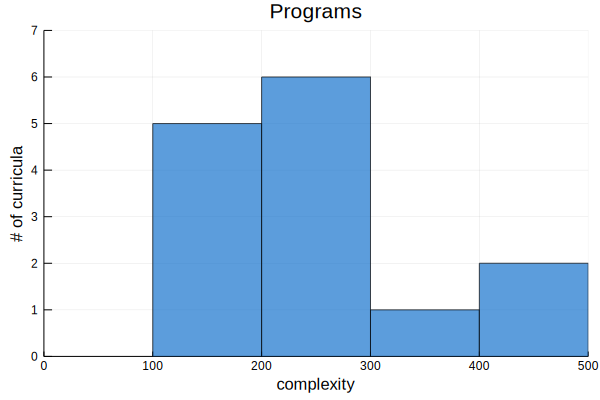

In [8]:
curricula = Array{Curriculum,1}()
metric = "complexity"
for (key, val) in plans
    push!(curricula, val.curriculum)
end
display(metric_histogram(curricula, metric, title=" Programs", xlabel="$(metric)", ylabel="# of curricula", xlim=(0,500)))

# Extraneous Prerequisites
The following function will find prerequisites in a curriculum.  These are redundant prerequisites that are unnecessary in a curriculum.  For example, if a curriculum has the prerequisite 
relationships $c_1 \rightarrow c_2 \rightarrow c_3$ and $c_1 \rightarrow c_3$, and $c_1$ and $c_2$ are 
*not* co-requisites, then $c_1 \rightarrow c_3$ is redundant and therefore extraneous.  Extraneous prerequisites do not effect the curricular complexity metric, they simply are unnecessary clutter in a curriculum or degree plan.

In [9]:
for plan in plans
    extraneous_requisites(plan[2].curriculum, print=true)
end


University of Arizona: curriculum Biomedical Engineering has extraneous requisites:
-Intro to Fluid Mechanics has redundant requisite Intro Mechanics


University of Arizona: curriculum Aerospace Engineering has extraneous requisites:
-Intro. to Aerospace Eng. has redundant requisite Vector Calculus
-Orbital Mechanicans and Space Flt. has redundant requisite Vector Calculus
-Aircraft Performance has redundant requisite Intro. to Aerospace Eng.


University of Arizona: curriculum Engineering Management has extraneous requisites:
-Intro Mechanics has redundant requisite Calculus I w/ Applications


University of Arizona: curriculum Industrial Engineering has extraneous requisites:
-Intro Mechanics has redundant requisite Calculus I w/ Applications


University of Arizona: curriculum Mechanical Engineering has extraneous requisites:
-Instrumentation Lab. has redundant requisite Thermodynamics
-Heat Transfer has redundant requisite Thermodynamics
-Control System Design has redundant requi

The extraneous prerequisite in this case is the MATH 129: Calculus II course associated ECE 220: Basic Circuits.  Because PHYS 241: Electricity & Magnetism is a prerequisite for Basic Circuits, and Calculus II is a prerequisite for Electricity & Magnetism, the Calculus II prerequisite associated with Basic Circuits is redundant and unnecessary.

## Dead End Courses
The following function can be used to find "dead end" courses in a curricula.  Dead end courses are those that appear at the end of a path (i.e., sink vertices), and are not a part of a course associated with the major.  E.g., in the case of the ECE curriculum above, these would be courses at the end of a path that do not have the "ECE" or "ENGR" prefix.  One might consider these courses dead ends, as their course outcomes are not (formally) used by any 
major-specific course, i.e., by any course with the prefix "ECE."

In [10]:
prefixes = Dict{String, Array{String,1}}()
prefixes["Aerospace Engineering"] = ["ENGR", "AME"]
prefixes["Architectural Engineering"] = ["ENGR", "ARCE"]
prefixes["Biomedical Engineering"] = ["ENGR", "BME"]
prefixes["Biosystems Engineering"] = ["ENGR", "BE"]
prefixes["Civil Engineering"] = ["ENGR", "CE"]
prefixes["Chemical Engineering"] = ["ENGR", "CHEE"]
prefixes["Computer Engineering"] = ["ENGR", "ECE"]
prefixes["Electrical Engineering"] = ["ENGR", "ECE"]
prefixes["Engineering Management"] = ["ENGR", "SIE"]
prefixes["Industrial Engineering"] = ["ENGR", "SIE"]
prefixes["Mechanical Engineering"] = ["ENGR", "AME"]
prefixes["Mining Engineering-Mine Operations Track"] = ["ENGR", "MNE"]
prefixes["Optical Engineering"] = ["ENGR", "OPTI"]
prefixes["Systems Engineering"] = ["ENGR", "SIE"];

In [11]:
for plan in plans
    de = dead_ends(plan[2].curriculum, prefixes[plan[2].curriculum.name])
    println("\nDead end courses in the $(plan[2].curriculum.name) curriculum:")
    for course in de[2]
        println("$(course.prefix) $(course.num): $(course.name)")
    end
end


Dead end courses in the Biomedical Engineering curriculum:
ENGL 102: First-year Comp
MATH  223: Vector Calculus
MCB 181L: Intro Biology I Lab
PHYS 241: Electricity & Magnetism
PSIO 202: Human Anatomy and Physio II
AME  301: Engineering Analysis
BME  331: Intro to Fluid Mechanics

Dead end courses in the Aerospace Engineering curriculum:
ENGL 102: First-year Comp.
ECE 175: Programming for Eng. Apps.
PHYS 241: Electricity & Magnetism

Dead end courses in the Engineering Management curriculum:
MATH  223: Vector Calculus
CE 214: Statistics
CHEE 201: Elements of Chem Eng
ECE 220: Basic Circuits
ENGL 308: Tech Writing

Dead end courses in the Industrial Engineering curriculum:
CHEM 152: Gen Chemistry II
MATH  223: Vector Calculus
ENGL 308: Tech Writing

Dead end courses in the Mechanical Engineering curriculum:
ENGL 102: First-year Comp.
ECE 175: Programming for Eng. Apps.
AME  205: Intro. To MATLAB II
ENGR  498B: Cross-disciplinary Design
AME  455: Control System Design

Dead end courses i

In [12]:
de = dead_ends(AE_plan.curriculum, ["AME", "ENGR"])
println("Dead end courses in the $(plan.curriculum.name) curriculum:\n")
for course in de[2]
    println("$(course.prefix) $(course.num): $(course.name)")
end

UndefVarError: UndefVarError: plan not defined

# Degree Plan Optimization 
The Curricular Analytics toolbox contains a number of functions that will create different degree plans for a curriculum depending upon various optimization criteria.  In order to use these functions, you must first install the Gourbi solver, called [Gurobi Optimizer](https://www.gurobi.com/downloads/gurobi-optimizer-eula). Gurobi is a commercial product, and requires a license key; however, [academic licenses](https://www.gurobi.com/downloads/end-user-license-agreement-academic) are available at no cost.

In [11]:
# Uncomment the following two lines if the Gurobi package has not yet been included in your Julia environment.
#using Pkg
#Pkg.add("Gurobi")
using Gurobi

┌ Warning: Package CurricularAnalytics does not have Gurobi in its dependencies:
│ - If you have CurricularAnalytics checked out for development and have
│   added Gurobi as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with CurricularAnalytics
│ Loading Gurobi into CurricularAnalytics from project dependency, future warnings for CurricularAnalytics are suppressed.
└ @ nothing nothing:840


In [15]:
metrics = basic_metrics(AE_plan)
println(String(take!(metrics)))


Curriculum: Aerospace Engineering
Degree Plan: 2019-20 Degree Plan
  total credit hours = 129
  number of terms = 8
  max. credits in a term = 18, in term 3
  min. credits in a term = 15, in term 4
  avg. credits per term = 16.125, with std. dev. = 0.9270248108869579



In [16]:
plan_new = optimize_plan(AE_plan.curriculum, 8, 12, 18, ["Balance"]);
visualize(plan_new, notebook=true)


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only
14.0


WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src=>"http://localhost:8156",:id=>"curriculum",:events=>Dict(:load=>JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Aerospace Engineering\",\"dp_name\":\"\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"CHEM 151\",\"metrics\":{\"complexity\":5.0,\"centrality\":0,\"blocking factor\":2,\"delay factor\":3.0},\"nameSub\":\"Gen Chemistry I\",\"id\":2,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"MATH 125\",\"metrics\":{\"complexity\":38.0,\"centrality\":0,\"blocking factor\":29,\"delay factor\":9.0},\"nameSub\":\"Calculus I w/ Applications\",\"id\":1,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Tier II General Ed.\",\"id\":34,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ENGL 101\",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"First-year Comp.\",\"id\":3,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"AME 211\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Comp. Aided Drafting & Manufacturing\",\"id\":16,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":8,\"type\":\"prereq\"}],\"name\":\"PHYS 141\",\"metrics\":{\"complexity\":27.0,\"centrality\":272,\"blocking factor\":18,\"delay factor\":9.0},\"nameSub\":\"Intro Mechanics\",\"id\":8,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Tier I General Ed.\",\"id\":17,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":3,\"target_id\":9,\"type\":\"prereq\"}],\"name\":\"ENGL 102\",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"First-year Comp.\",\"id\":9,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":6,\"type\":\"prereq\"}],\"name\":\"MATH 129\",\"metrics\":{\"complexity\":30.0,\"centrality\":388,\"blocking factor\":22,\"delay factor\":8.0},\"nameSub\":\"Calculus II\",\"id\":6,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Tier I General Ed.\",\"id\":5,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Technical Elective\",\"id\":44,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":6,\"target_id\":13,\"type\":\"prereq\"}],\"name\":\"MATH  223\",\"metrics\":{\"complexity\":24.0,\"centrality\":258,\"blocking factor\":17,\"delay factor\":7.0},\"nameSub\":\"Vector Calculus\",\"id\":13,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":7,\"type\":\"prereq\"}],\"name\":\"AME 105\",\"metrics\":{\"complexity\":15.0,\"centrality\":28,\"blocking factor\":9,\"delay factor\":6.0},\"nameSub\":\"Intro. to MATLAB I\",\"id\":7,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":8,\"target_id\":12,\"type\":\"prereq\"},{\"source_id\":6,\"target_id\":12,\"type\":\"prereq\"}],\"name\":\"CE 214\",\"metrics\":{\"complexity\":23.0,\"centrality\":254,\"blocking factor\":14,\"delay factor\":9.0},\"nameSub\":\"Statics\",\"i

In [16]:
metrics = basic_metrics(plan_new)
println(String(take!(metrics)))


Curriculum: Aerospace Engineering
Degree Plan: 
  total credit hours = 129
  number of terms = 8
  max. credits in a term = 17, in term 3
  min. credits in a term = 16, in term 1
  avg. credits per term = 16.125, with std. dev. = 0.33071891388307384



In [17]:
plan_new = optimize_plan(AE_plan.curriculum, 8, 12, 18, ["Balance", "Prereq"]);
visualize(plan_new, notebook=true)


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only
14.0
75.0


WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src=>"http://localhost:8156",:id=>"curriculum",:events=>Dict(:load=>JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Aerospace Engineering\",\"dp_name\":\"\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"CHEM 151\",\"metrics\":{\"complexity\":5.0,\"centrality\":0,\"blocking factor\":2,\"delay factor\":3.0},\"nameSub\":\"Gen Chemistry I\",\"id\":2,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":4,\"type\":\"coreq\"}],\"name\":\"ENGR 102\",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"Intro to Engineering\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"MATH 125\",\"metrics\":{\"complexity\":38.0,\"centrality\":0,\"blocking factor\":29,\"delay factor\":9.0},\"nameSub\":\"Calculus I w/ Applications\",\"id\":1,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Tier II General Ed.\",\"id\":34,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":10,\"type\":\"coreq\"}],\"name\":\"ECE 175\",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"Programming for Eng. Apps.\",\"id\":10,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Tier I General Ed.\",\"id\":11,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Technical Elective\",\"id\":44,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Tier II General Ed.\",\"id\":45,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":7,\"type\":\"prereq\"}],\"name\":\"AME 105\",\"metrics\":{\"complexity\":15.0,\"centrality\":28,\"blocking factor\":9,\"delay factor\":6.0},\"nameSub\":\"Intro. to MATLAB I\",\"id\":7,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ENGL 101\",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"First-year Comp.\",\"id\":3,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"AME 211\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Comp. Aided Drafting & Manufacturing\",\"id\":16,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":8,\"type\":\"prereq\"}],\"name\":\"PHYS 141\",\"metrics\":{\"complexity\":27.0,\"centrality\":272,\"blocking factor\":18,\"delay factor\":9.0},\"nameSub\":\"Intro Mechanics\",\"id\":8,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":3,\"target_id\":9,\"type\":\"prereq\"}],\"name\":\"ENGL 102\",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"First-year Comp.\",\"id\":9,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":6,\"type\":\"prereq\"}],\"name\":\"MATH 129\",\"metrics\":{\"complexity\":30.0,\"centrality\":388,\"blocking factor\":22,\"delay factor\":8.0},\"nameSub\":\"Calculus II\",\"id\":6,\"credits\":3,\"nameCanonical\":\"

In [18]:
metrics = basic_metrics(plan_new)
println(String(take!(metrics)))


Curriculum: Aerospace Engineering
Degree Plan: 
  total credit hours = 129
  number of terms = 8
  max. credits in a term = 17, in term 4
  min. credits in a term = 16, in term 1
  avg. credits per term = 16.125, with std. dev. = 0.33071891388307384



## References
<a id='References'></a>

[1] Heileman, G. L., Abdallah, C.T., Slim, A., and Hickman, M. (2018). Curricular analytics: A framework for quantifying the impact of curricular reforms and pedagogical innovations. www.arXiv.org, arXiv:1811.09676 [cs.CY].

[2] Heileman, G. L., Free, H. W., Abar, O. and Thompson-Arjona, W. G, (2019). CurricularAnalytics.jl Toolbox. https://github.com/heileman/CurricularAnalytics.jl.